In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import nbformat
from scipy.stats import gaussian_kde
import geopandas as gpd
import contextily as ctx

In [72]:
df = pd.read_csv("../R/data_r_processed.csv")

In [73]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [74]:
df

,Id,Year,Companyname,Country,Employees,Market.Cap,Tot.Assets,Revenue,Net.Income,Roe,...,Absent.Cdp.Initiative.Firm.Year.Processed.Csv,Cdp.Risk.Transition,Cdp.Risk.Physical,Cdp.Aggregated.Opp,Absent.Cdp.Riskopp.Processed.Csv,Method.Ind,Type.Scope1,Cdp.Aggregated.Risk,Ghg.Change.Real.Prev,Ghg.Change.Real.Lag1
0,44,0,3i Group,United Kingdom,6.274762,22.158500,22.921164,20.579931,2.336873e+08,0.723907,...,0,0,0,1,0,Other,N.A,0,NaN,NaN
1,44,1,3i Group,United Kingdom,6.154858,22.239586,22.945632,20.250692,2.980762e+08,0.721685,...,1,0,0,1,0,Other,N.A,0,-11.00,-11.00
2,44,2,3i Group,United Kingdom,6.159095,21.891776,22.720924,19.980845,-1.254804e+09,0.552909,...,0,1,1,1,0,Other,Third.Party.Underway,1,0.00,0.00
3,44,3,3i Group,United Kingdom,5.883322,22.263379,22.602524,20.182098,2.781161e+08,0.725525,...,0,1,1,1,0,Other,N.A,1,-1.00,-1.00
4,44,5,3i Group,United Kingdom,5.605802,22.661978,22.707989,20.628547,1.037036e+09,0.787000,...,0,1,1,1,0,Other,Limited/Moderate,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13736,832279,9,RHI Magnesita,United Kingdom,9.573315,21.633140,21.981048,21.909929,1.558301e+08,0.775252,...,1,1,0,1,0,Other,Third.Party.Underway,1,0.00,0.00
13737,832279,10,RHI Magnesita,United Kingdom,9.438670,21.567978,21.971482,21.737858,3.028080e+07,0.709877,...,0,0,0,1,0,Other,Reasonable,0,-1.00,-1.00
13738,833291,8,Wyndham Hotels & Resorts,USA,9.692828,22.216258,22.327892,20.971687,1.620000e+08,0.751838,...,0,1,1,1,0,Other,Limited/Moderate,1,-1.00,-1.00
13739,833291,9,Wyndham Hotels & Resorts,USA,9.561068,22.494655,22.234650,21.080940,1.570000e+08,0.751129,...,0,0,0,1,0,Other,Limited/Moderate,0,0.00,0.00


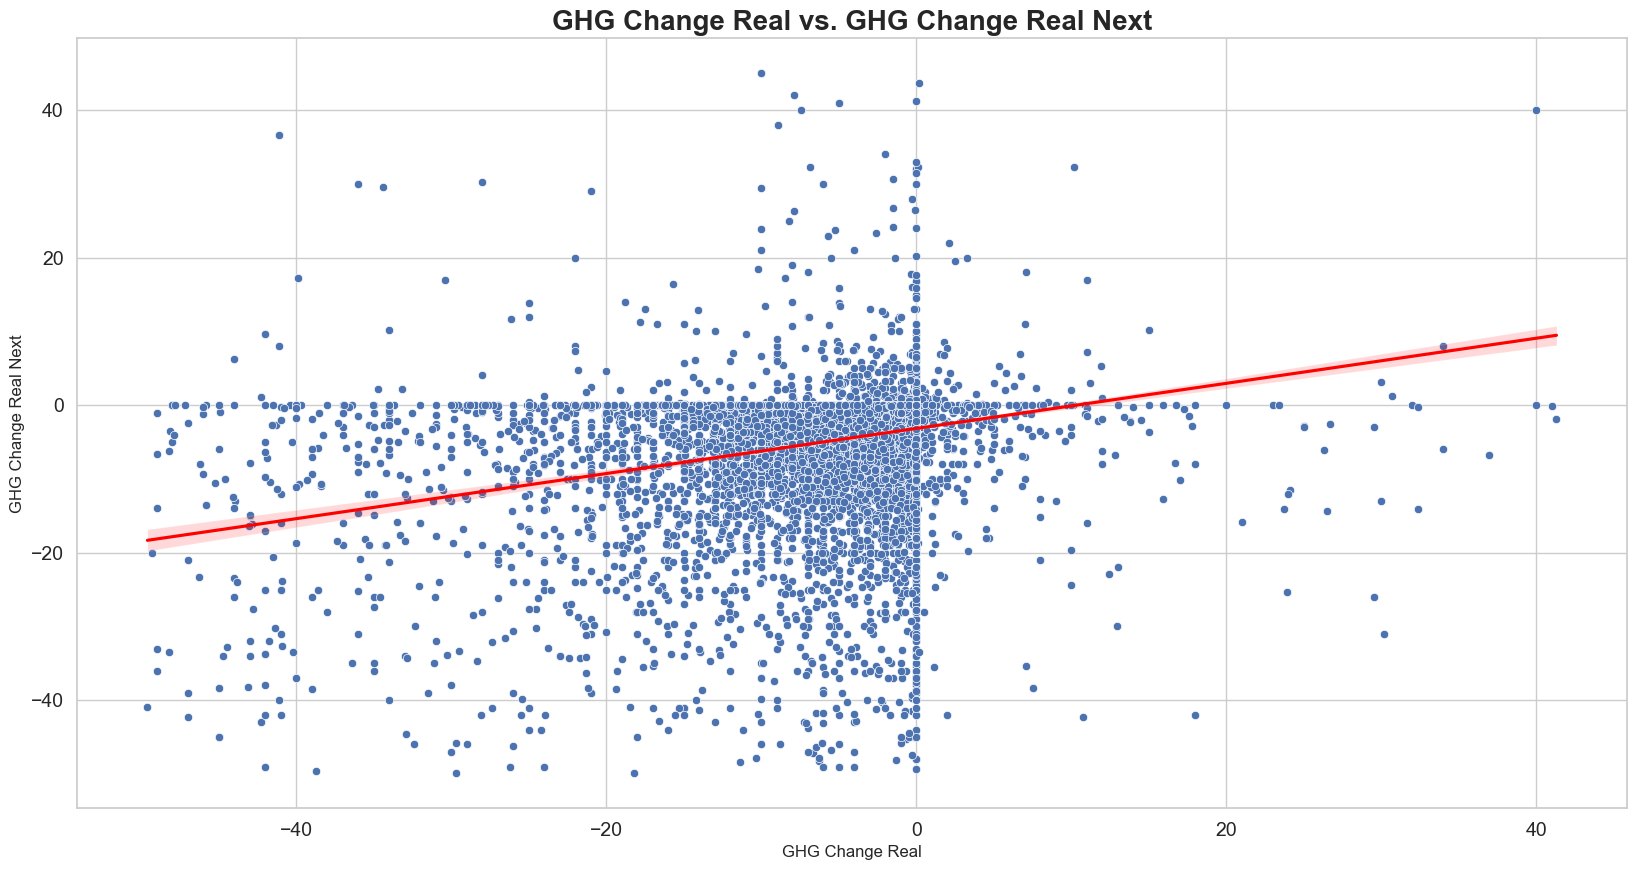

In [75]:
# plot ghg.change.real vs. ghg.change.real.next usig seaborn style seaborn include regression line
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Ghg.Change.Real", y="Ghg.Change.Real.Next", data=df)
# include regression line
sns.regplot(x="Ghg.Change.Real", y="Ghg.Change.Real.Next", data=df, scatter=False, color="red")
plt.xlabel("GHG Change Real")
plt.ylabel("GHG Change Real Next")
# make figure font bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# also title big and bold
plt.title("GHG Change Real vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.savefig("../../thesis_tex/figures/ghg_change_real_vs_ghg_change_real_next.png")
plt.show()

# save plot as image


In [76]:
df["Year"] = df["Year"] + 2011

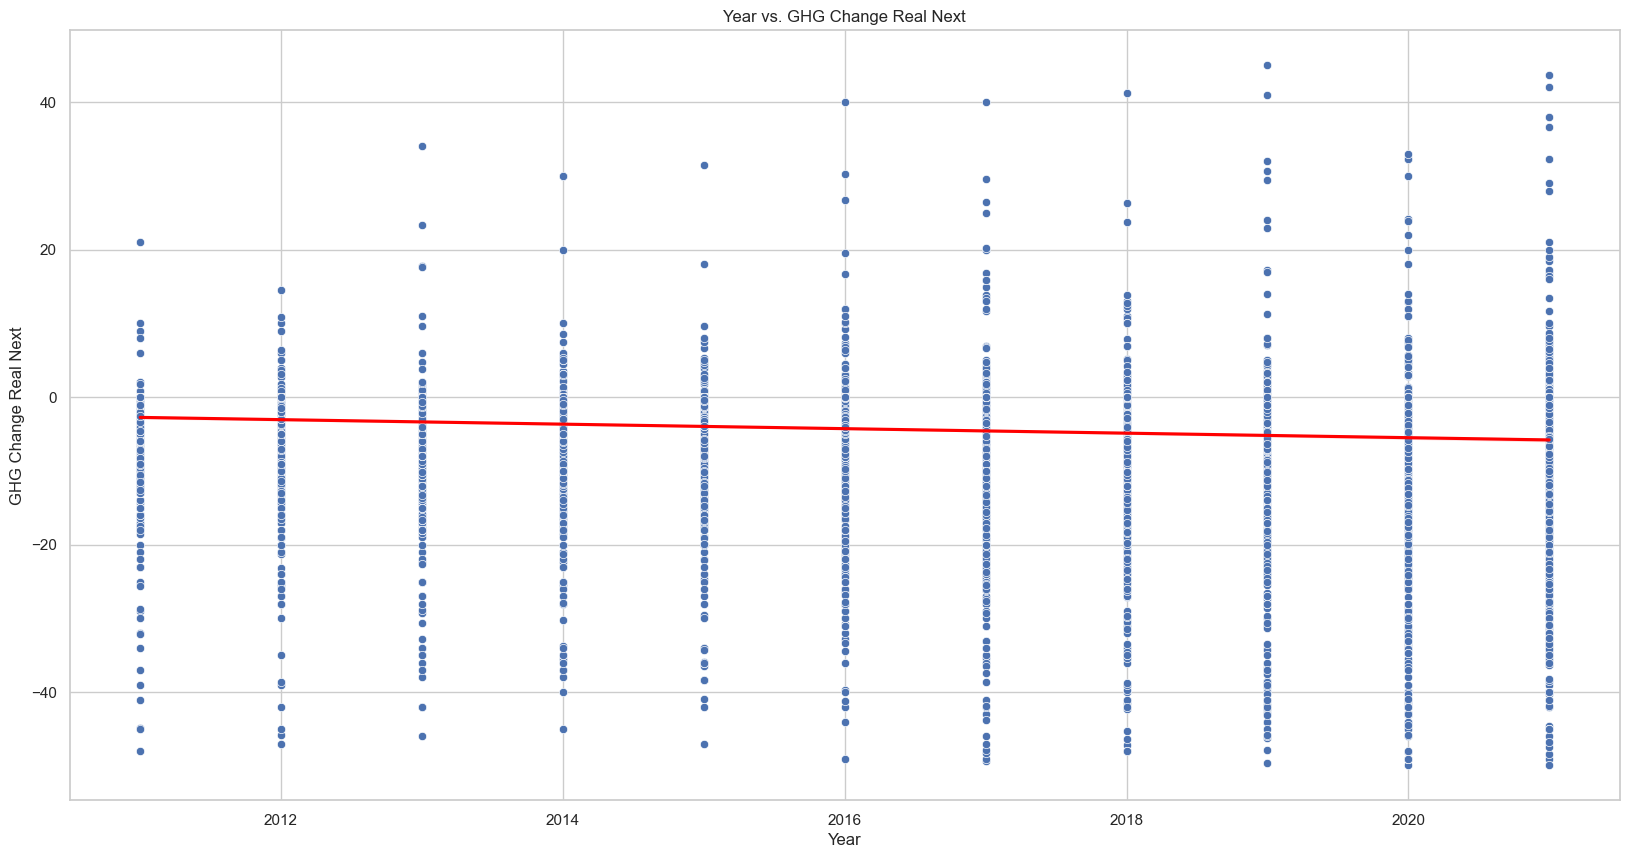

In [77]:
# do the same for year and ghg.change.real.next
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Year", y="Ghg.Change.Real.Next", data=df)
sns.regplot(x="Year", y="Ghg.Change.Real.Next", data=df, scatter=False, color="red")
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Year vs. GHG Change Real Next")
plt.savefig("../../thesis_tex/figures/year_vs_ghg_change_real_next.png")
plt.show()

# save plot as image


In [78]:
# now group by industry and year and calculate mean ghg.change.real.next plot it then
df_grouped = df.groupby(["Industry", "Year"])['Ghg.Change.Real.Next'].mean().reset_index()

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seabo

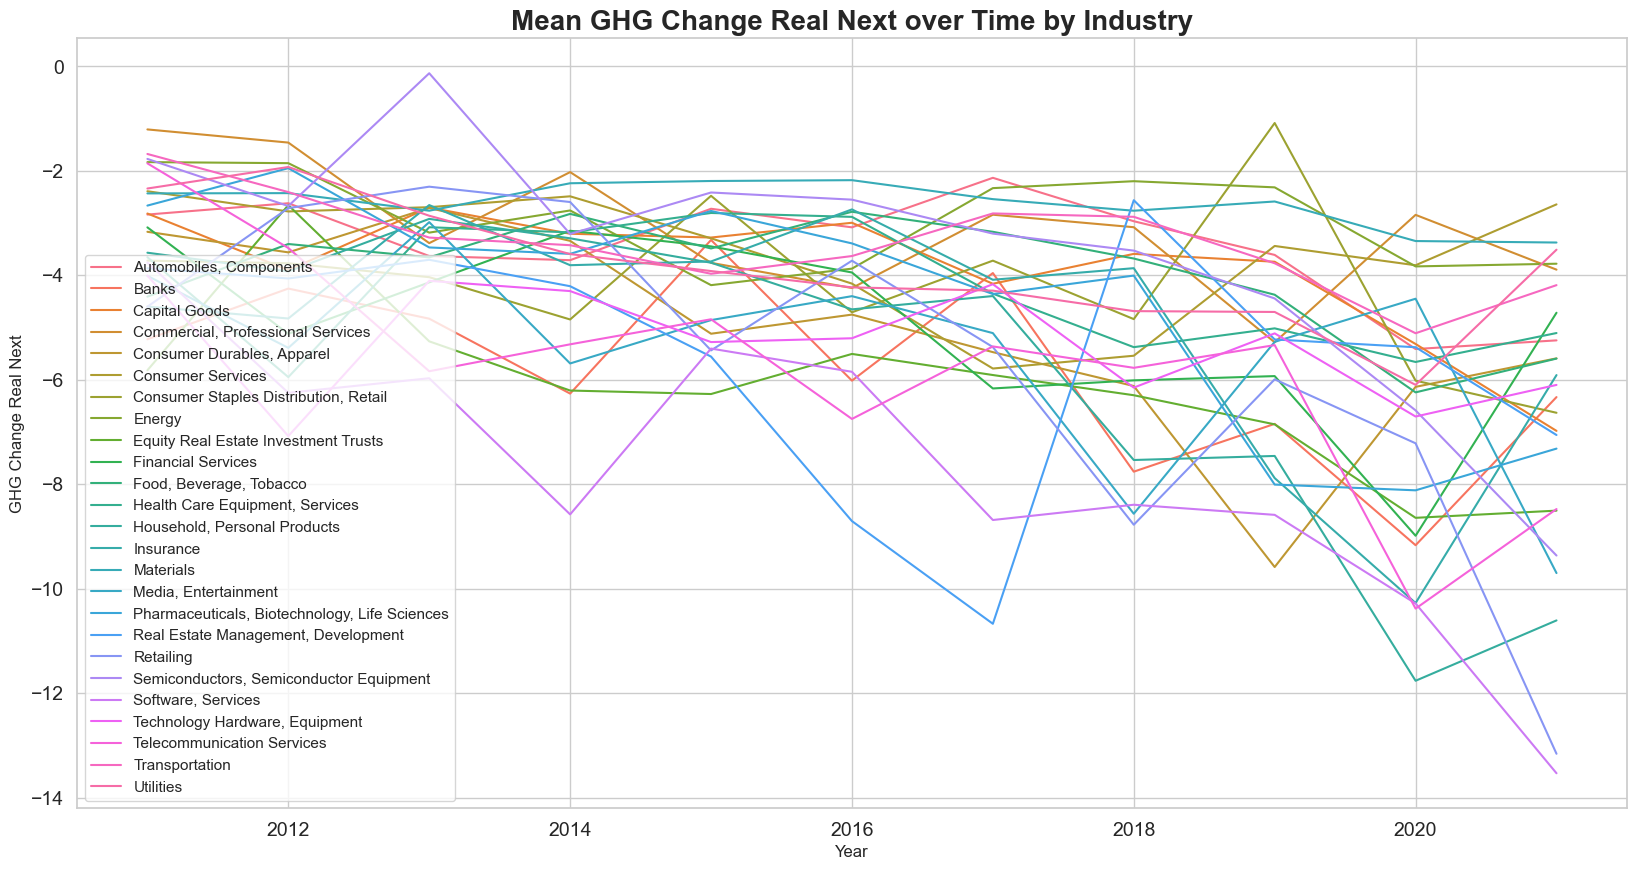

In [79]:
# now plot each as a lineplot with seaborn and use legend
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Ghg.Change.Real.Next", hue="Industry", data=df_grouped)
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Mean GHG Change Real Next over Time by Industry", fontsize=20, fontweight="bold")
# make it cool
plt.legend(loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_over_time_by_industry.png")
plt.show()


/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seabo

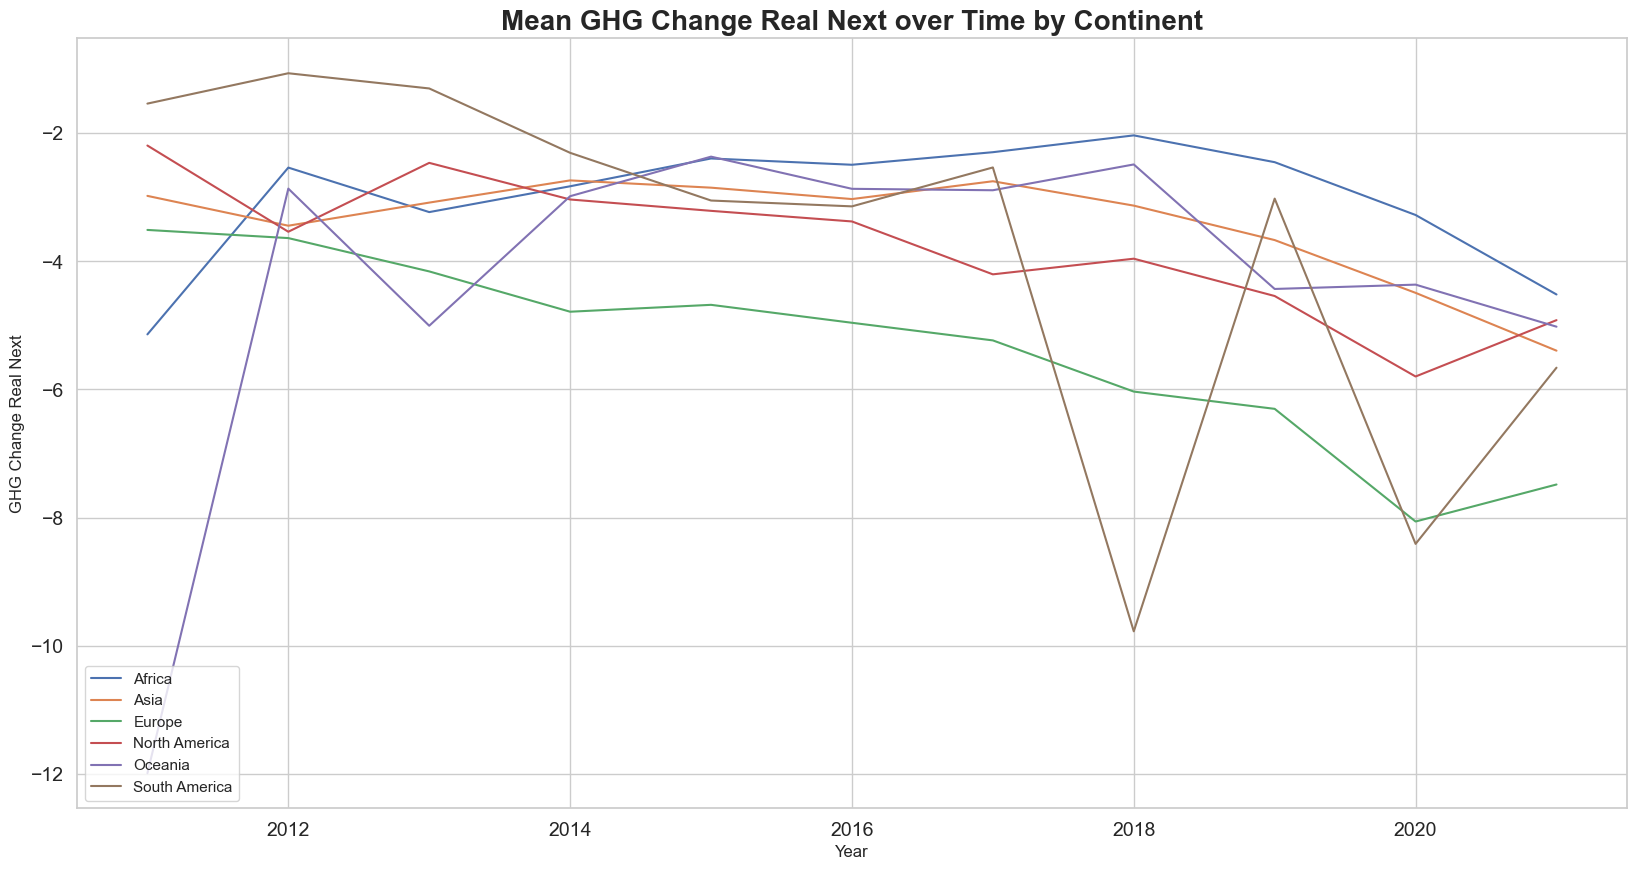

In [80]:
# do the same for continent
df_grouped = df.groupby(["Continent", "Year"])['Ghg.Change.Real.Next'].mean().reset_index()

# now plot each as a lineplot with seaborn and use legend
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Ghg.Change.Real.Next", hue="Continent", data=df_grouped)
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Mean GHG Change Real Next over Time by Continent", fontsize=20, fontweight="bold")
# make it cool
plt.legend(loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_over_time_by_continent.png")
plt.show()

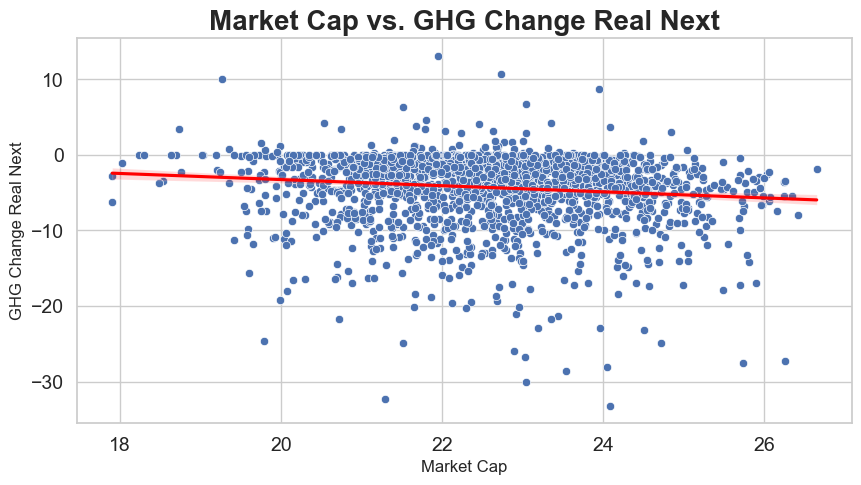

In [86]:
# ok now group firms by id, take the mean of ghg.change.real.next and market.cap and plot it
market_cap = df.groupby(["Id"])['Market.Cap'].mean().reset_index()
ghg_change = df.groupby(["Id"])['Ghg.Change.Real.Next'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Market.Cap", y="Ghg.Change.Real.Next", data=pd.merge(market_cap, ghg_change, on="Id"))
sns.regplot(x="Market.Cap", y="Ghg.Change.Real.Next", data=pd.merge(market_cap, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Market Cap")
plt.ylabel("GHG Change Real Next")
plt.title("Market Cap vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/market_cap_vs_ghg_change_real_next.png")
plt.show()


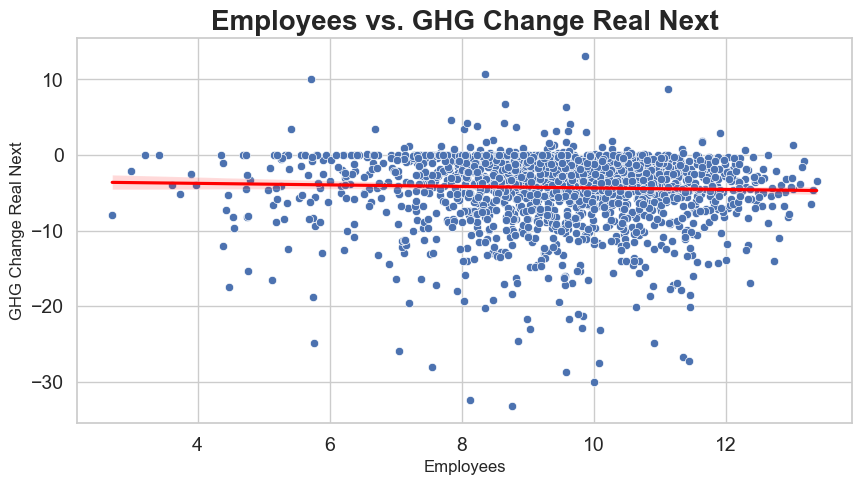

In [85]:
# do the same for employees
employees = df.groupby(["Id"])['Employees'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10,5))
sns.scatterplot(x="Employees", y="Ghg.Change.Real.Next", data=pd.merge(employees, ghg_change, on="Id"))
sns.regplot(x="Employees", y="Ghg.Change.Real.Next", data=pd.merge(employees, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Employees")
plt.ylabel("GHG Change Real Next")
plt.title("Employees vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/employees_vs_ghg_change_real_next.png")
plt.show()

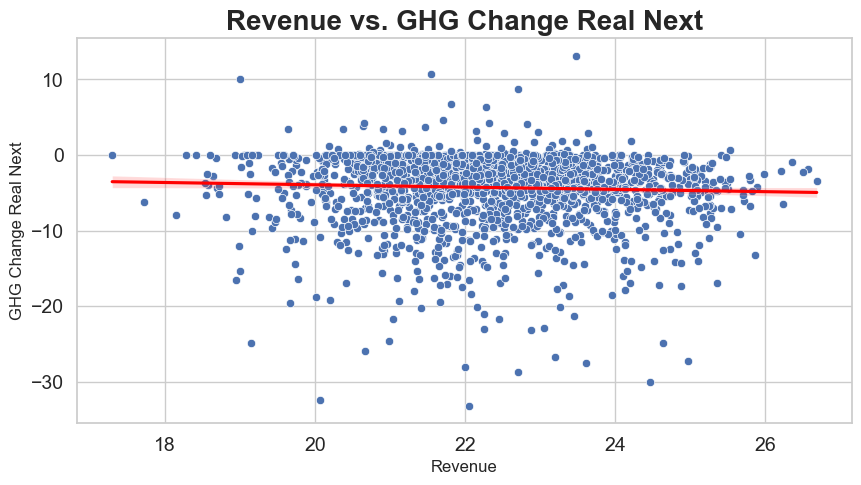

In [84]:
# do the same for Revenue
revenue = df.groupby(["Id"])['Revenue'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Revenue", y="Ghg.Change.Real.Next", data=pd.merge(revenue, ghg_change, on="Id"))
sns.regplot(x="Revenue", y="Ghg.Change.Real.Next", data=pd.merge(revenue, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Revenue")
plt.ylabel("GHG Change Real Next")
plt.title("Revenue vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/revenue_vs_ghg_change_real_next.png")
plt.show()